In [132]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import configparser
import pandas as pd
import re


In [133]:
df=pd.read_csv('N95.csv')

In [134]:
df

,Unnamed: 0,User,Tweet
0,0,hamadah_hala,: I don’t know who still needs to hear this bu...
1,1,Tazmani79499769,_USA: BREAKING: The CDC has issued new guidanc...
2,2,TBrno11,: Message of the Day\nThanks to the Biden Admi...
3,3,DamskyPhoebe,": In an academic forum, the University confirm..."
4,4,GoodAppleClub,How to Get the Best Protection From Your N95 -...
...,...,...,...
95,95,MilesStotts,_USA: BREAKING: The CDC has issued new guidanc...
96,96,johnwenger9,Cinemas are generally not a high risk environ...
97,97,AEfuentescaiman,: __tty _marchant _brevis Para …
98,98,LantagneS,": N95 partout partout, même les corridors, mêm..."


In [111]:
df.drop(columns='Unnamed: 0',axis=1)

,User,Tweet
0,jdTPPfL6mabrB09,: もちろんワクチンも大事だが、この2年間ずっとコロナ病棟にいながら感染してないってことは、...
1,Rosenchild,➡️ GET YOUR FREE:\n\n✅ 1st COVID19 Vaccine S...
2,josianecossette,Étudiants : à vos N95. (Vous le savez que le d...
3,TedGrunewald,_dewald: Herd immunity is a myth\n\nMore than ...
4,FrabjousBat,Fuck these N95 masks they hurt my fat fucking ...
...,...,...
995,Ed73540948,: The Trump administration used USPS to slow d...
996,AnishinaabeFc,: We have free N95 masks! 😷\n\navailable for p...
997,sacchar1n_sweet,i am wearing an n95. \n\nbut is that enough. ...
998,turnip_head21,: We have free N95 masks! 😷\n\navailable for p...


In [124]:
#clean text
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)#removed @mentions
    text=re.sub(r'#','',text) #remove hashtag
    text=re.sub(r'RT[\s]+','',text) #remove RT
    text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlink
    return text
df['Tweet']=df['Tweet'].apply(cleanTxt)

df.head()

,Unnamed: 0,User,Tweet
0,0,hamadah_hala,: I don’t know who still needs to hear this bu...
1,1,Tazmani79499769,_USA: BREAKING: The CDC has issued new guidanc...
2,2,TBrno11,: Message of the Day\nThanks to the Biden Admi...
3,3,DamskyPhoebe,": In an academic forum, the University confirm..."
4,4,GoodAppleClub,How to Get the Best Protection From Your N95 -...


In [125]:
#Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweet'].apply(getSubjectivity)
df['Polarity']=df['Tweet'].apply(getPolarity)

df.head()

,Unnamed: 0,User,Tweet,Subjectivity,Polarity
0,0,hamadah_hala,: I don’t know who still needs to hear this bu...,0.000000,0.000000
1,1,Tazmani79499769,_USA: BREAKING: The CDC has issued new guidanc...,0.477273,0.318182
2,2,TBrno11,: Message of the Day\nThanks to the Biden Admi...,0.500000,0.300000
3,3,DamskyPhoebe,": In an academic forum, the University confirm...",0.484848,0.178788
4,4,GoodAppleClub,How to Get the Best Protection From Your N95 -...,0.300000,1.000000


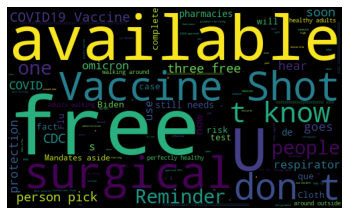

In [126]:
#Plot WordCloud
#adding stopwords
STOPWORDS.add("N95")
STOPWORDS.add("Masks")
stopwords=set(STOPWORDS)

allWords=''.join([twts for twts in df['Tweet']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119,stopwords=STOPWORDS).generate(allWords)

plt.imshow(wordCloud,interpolation='kaiser')
plt.axis('off')
plt.show()

In [127]:
#Sentiment Analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)
df.head()

,Unnamed: 0,User,Tweet,Subjectivity,Polarity,Analysis
0,0,hamadah_hala,: I don’t know who still needs to hear this bu...,0.000000,0.000000,Neutral
1,1,Tazmani79499769,_USA: BREAKING: The CDC has issued new guidanc...,0.477273,0.318182,Positive
2,2,TBrno11,: Message of the Day\nThanks to the Biden Admi...,0.500000,0.300000,Positive
3,3,DamskyPhoebe,": In an academic forum, the University confirm...",0.484848,0.178788,Positive
4,4,GoodAppleClub,How to Get the Best Protection From Your N95 -...,0.300000,1.000000,Positive


In [128]:
#positive tweets percentage
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

61.0

In [129]:
#negative tweets percentage
ptweets=df[klarna_tweets.Analysis=='Negative']
ptweets=ptweets['Tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

11.0

In [130]:
#neutral tweets percentage
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

32.0

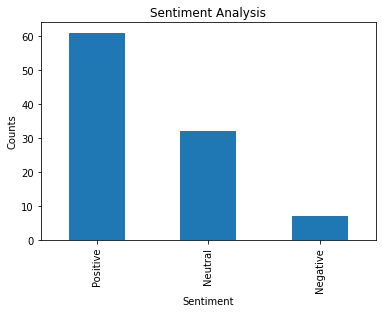

In [131]:
#plot value counts
df.value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()